In [79]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

In [3]:
dpath = "/media/nick/Seagate Backup Plus Drive/Data/MCO_Drought_Plan/"
df = pd.read_csv(dpath + "spi_data_2_day_lag.csv", parse_dates=True)
df['direction'] = df['id'].str.split("_", n=2).apply(lambda x: x[-1])
df['timeperiod'] = (df['dm_time'] > '2016-12-31').replace(False, '2010-2016').replace(True, '2017-2021')
df.head()

,dm_time,spi_time,X,Y,id,spi_30,spi_30_n,spi_60,spi_60_n,spi_90,spi_90_n,spi_180,spi_180_n,spi_365,spi_365_n,direction,timeperiod
0,2001-01-09,2001-01-07,-109.373118,45.023643,dm_none_minus,-0.005983,22,-0.342665,22,-1.027653,22,-0.806969,22,-0.539562,22,minus,2010-2016
1,2001-01-09,2001-01-07,-109.322365,45.023573,dm_none_minus,-0.093660,22,-0.409679,22,-1.098334,22,-0.858754,22,-0.530478,22,minus,2010-2016
2,2001-01-09,2001-01-07,-109.271612,45.023480,dm_none_minus,-0.100346,22,-0.427658,22,-1.134108,22,-0.846280,22,-0.487140,22,minus,2010-2016
3,2001-01-09,2001-01-07,-109.220860,45.023364,dm_none_minus,-0.128812,22,-0.442095,22,-1.147172,22,-0.802364,22,-0.439200,22,minus,2010-2016
4,2001-01-09,2001-01-07,-109.423821,45.059684,dm_none_minus,-0.041505,22,-0.407912,22,-1.052112,22,-0.857707,22,-0.606821,22,minus,2010-2016


In [4]:
df_long = pd.wide_to_long(df, stubnames='spi_', i=['id', 'dm_time', 'X', 'Y'], j='Lag')[['spi_', 'direction', 'timeperiod']]
df_long.columns = ['SPI', 'Direction', 'Timeperiod']

In [5]:
df_long.head()

SPI Direction  \
id            dm_time    X           Y         Lag                       
dm_none_minus 2001-01-09 -109.373118 45.023643 30  -0.005983     minus   
                                               60  -0.342665     minus   
                                               90  -1.027653     minus   
                                               180 -0.806969     minus   
                                               365 -0.539562     minus   

                                                   Timeperiod  
id            dm_time    X           Y         Lag             
dm_none_minus 2001-01-09 -109.373118 45.023643 30   2010-2016  
                                               60   2010-2016  
                                               90   2010-2016  
                                               180  2010-2016  
                                               365  2010-2016

In [11]:
df_plus = df_long.loc[df_long['Direction'] == 'plus']
df_plus_old = df_plus.loc[df_plus['Timeperiod'] == '2010-2016']
df_plus_new = df_plus.loc[df_plus['Timeperiod'] == '2017-2021']
df_minus = df_long.loc[df_long['Direction'] == 'minus']
df_minus_old = df_minus.loc[df_minus['Timeperiod'] == '2010-2016']
df_minus_new = df_minus.loc[df_minus['Timeperiod'] == '2017-2021']

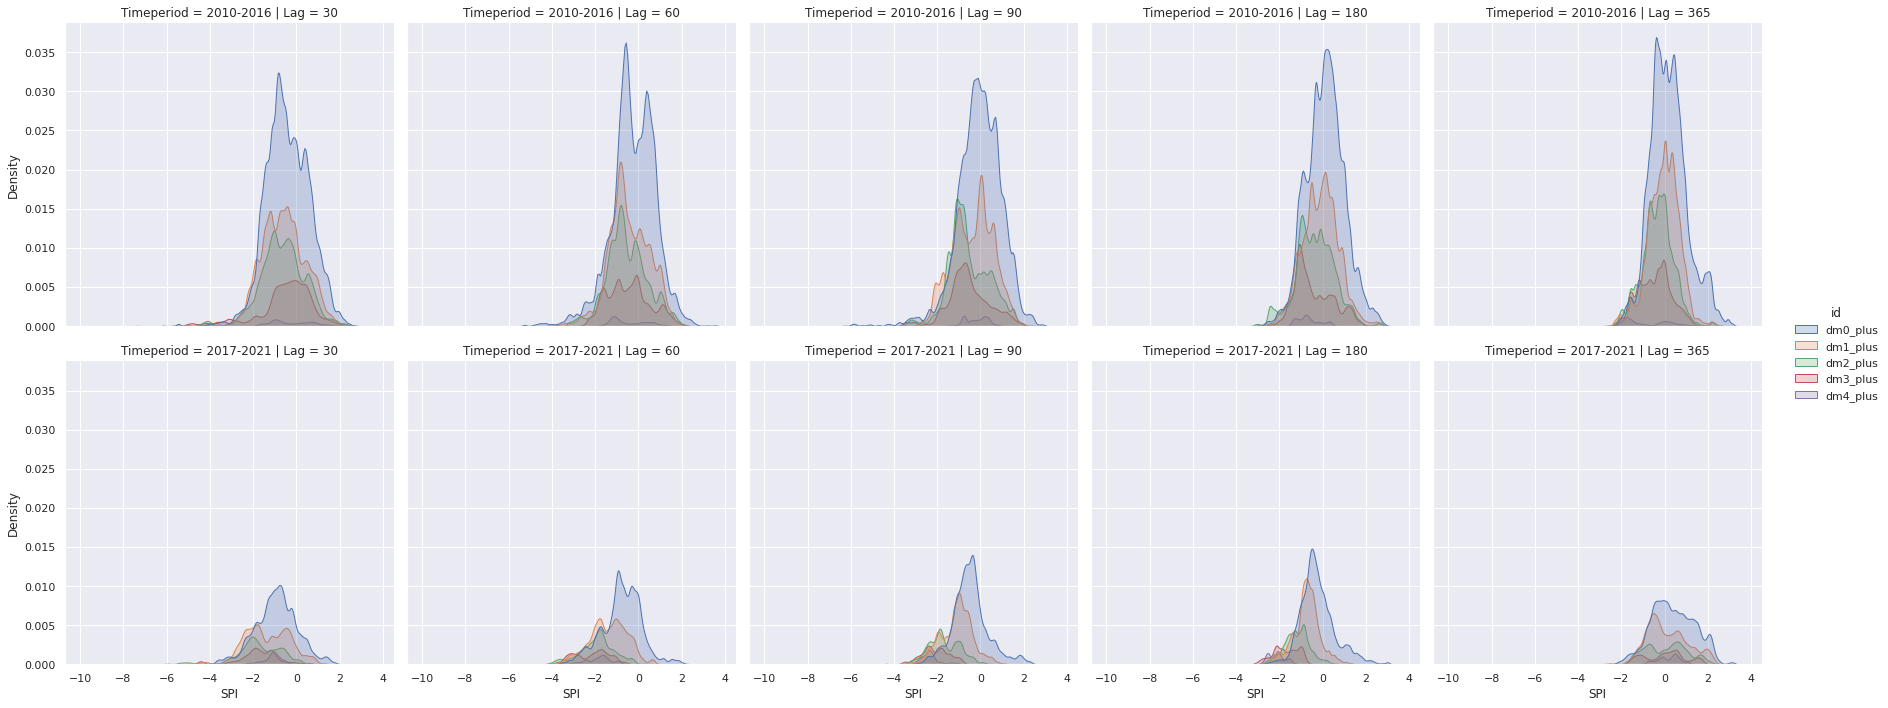

In [9]:
sns.displot(data=df_plus, col='Lag', row='Timeperiod', x='SPI', kind='kde', hue='id', legend=True, fill=True)

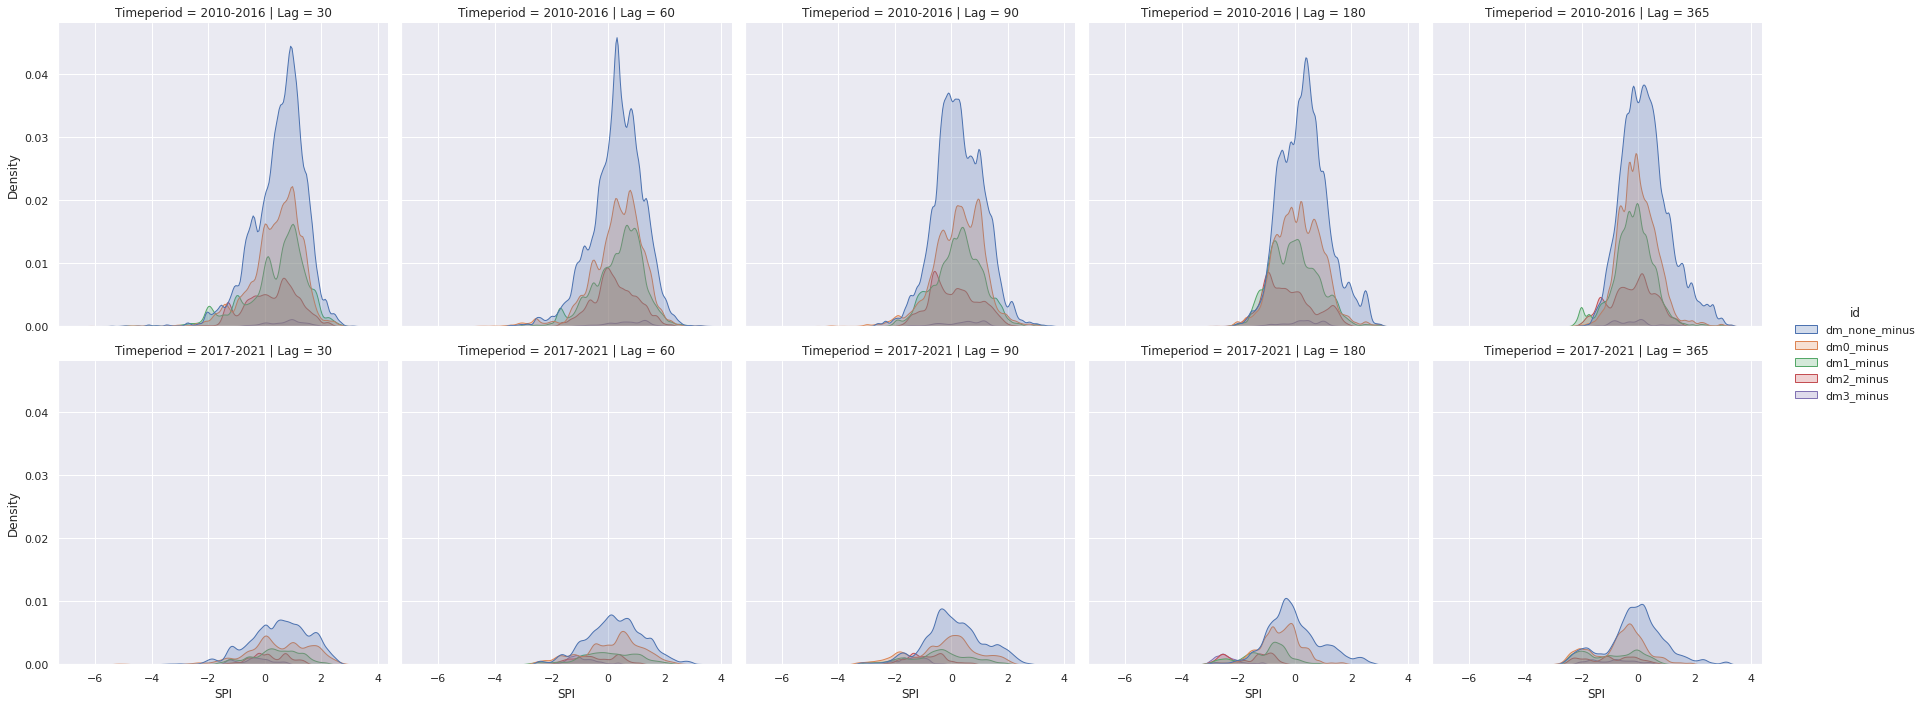

In [65]:
sns.displot(data=df_minus, col='Lag', row='Timeperiod', x='SPI', kind='kde', hue='id', legend=True, fill=True)

## 2010-2016 Increasing Drought Trigger

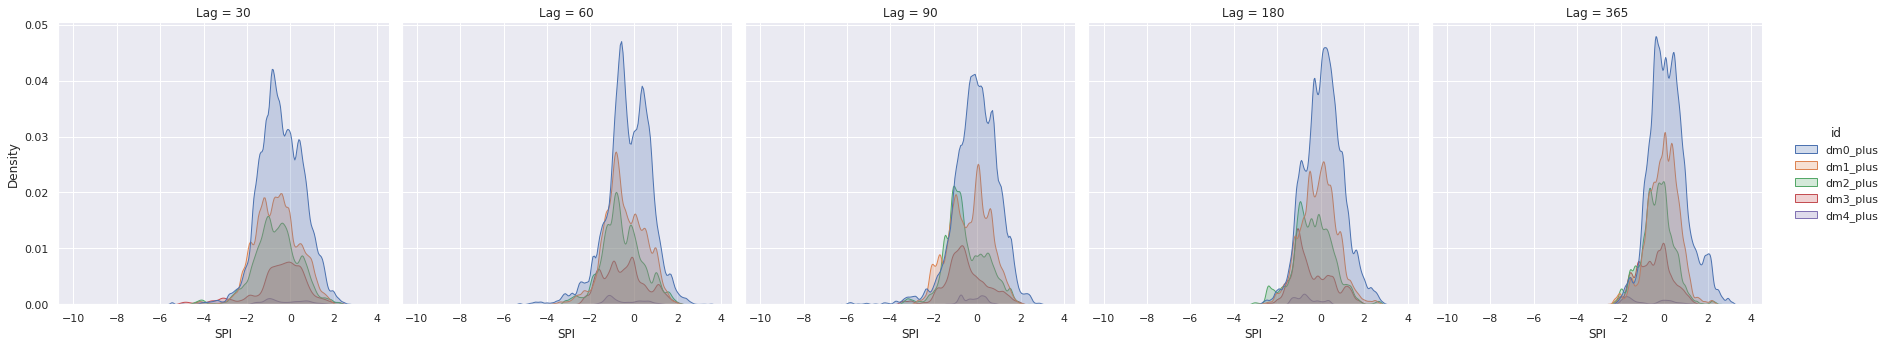

In [12]:
sns.displot(data=df_plus_old, col='Lag', x='SPI', kind='kde', hue='id', legend=True, fill=True)

## 2017-2021 Increasing Drought Trigger

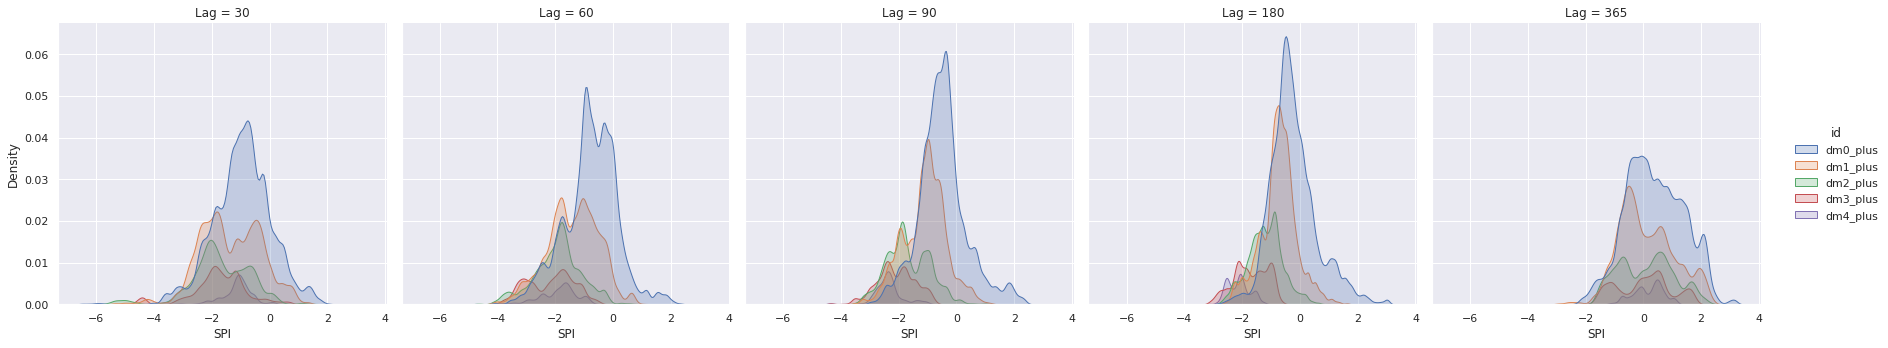

In [13]:
sns.displot(data=df_plus_new, col='Lag', x='SPI', kind='kde', hue='id', legend=True, fill=True)

## 2010-2016 Decreasing Drought Trigger

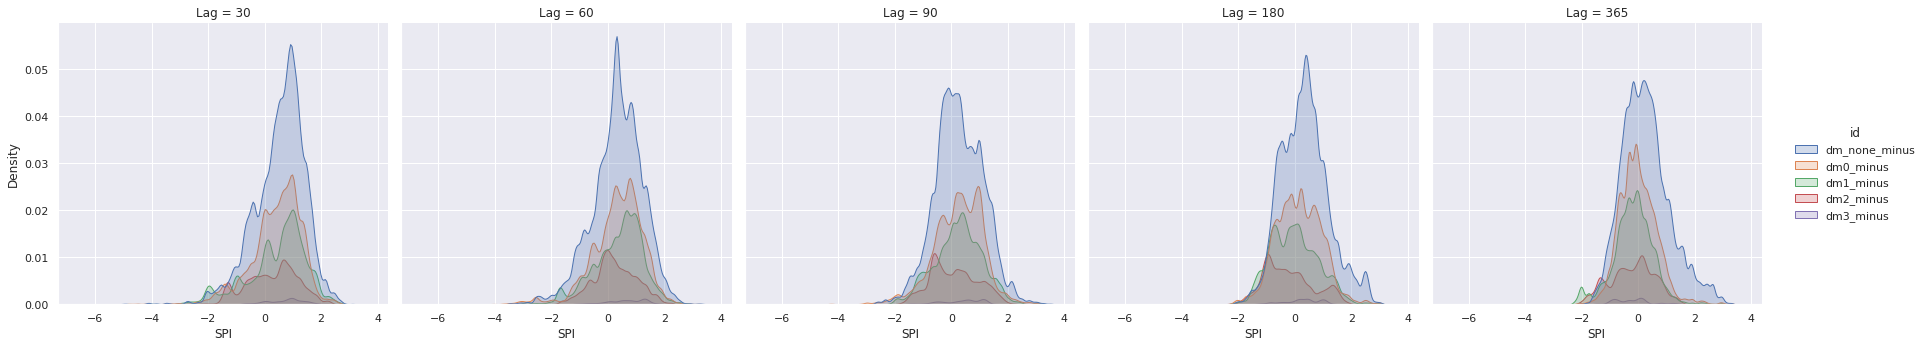

In [14]:
sns.displot(data=df_minus_old, col='Lag', x='SPI', kind='kde', hue='id', legend=True, fill=True)

## 2017-2021 Decreasing Drought Trigger

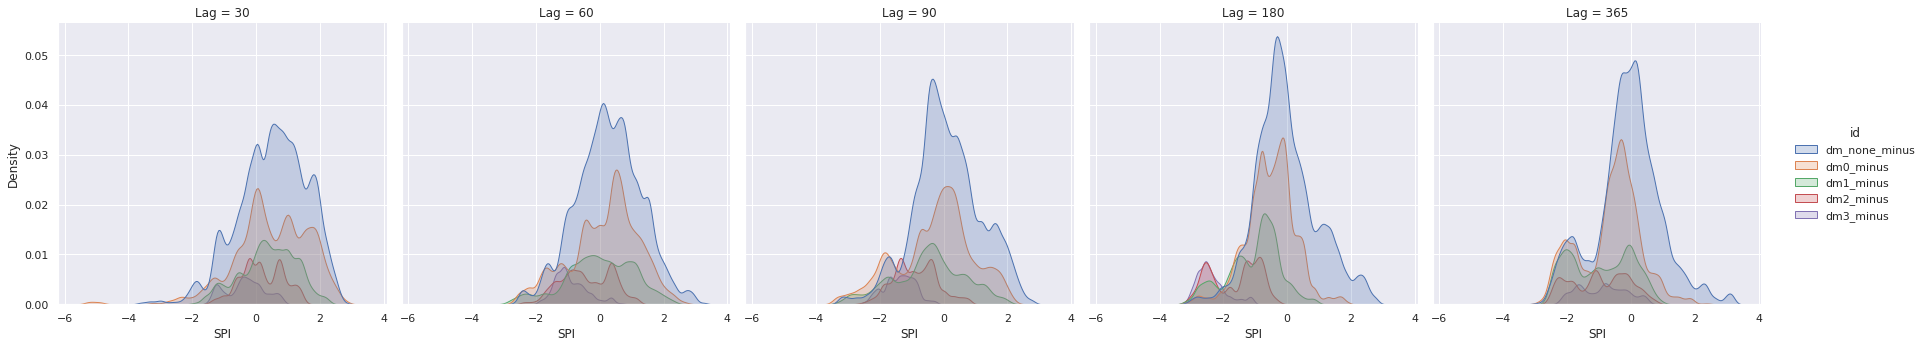

In [15]:
sns.displot(data=df_minus_new, col='Lag', x='SPI', kind='kde', hue='id', legend=True, fill=True)

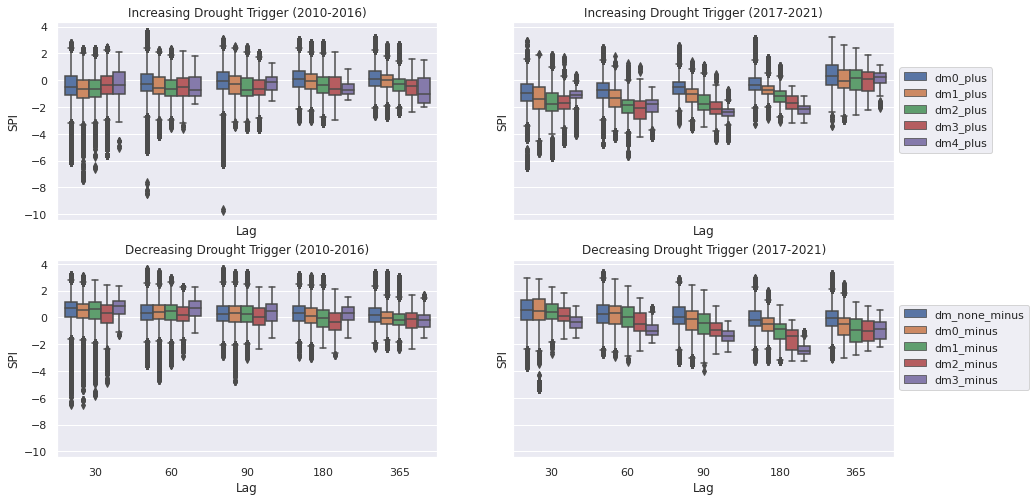

In [112]:
fig, axs = plt.subplots(2, 2, figsize=(15, 8), sharex=True, sharey=True)
a = sns.boxplot(ax=axs[0,0], data=df_plus_old.reset_index(), x="Lag", y="SPI", hue="id")
b = sns.boxplot(ax=axs[0,1], data=df_plus_new.reset_index(), x="Lag", y="SPI", hue="id")
c = sns.boxplot(ax=axs[1,0], data=df_minus_old.reset_index(), x="Lag", y="SPI", hue="id")
d = sns.boxplot(ax=axs[1,1], data=df_minus_new.reset_index(), x="Lag", y="SPI", hue="id")

a.legend_.remove()
c.legend_.remove()

axs[0,0].set_title('Increasing Drought Trigger (2010-2016)')
axs[0,1].set_title('Increasing Drought Trigger (2017-2021)')
axs[1,0].set_title('Decreasing Drought Trigger (2010-2016)')
axs[1,1].set_title('Decreasing Drought Trigger (2017-2021)')

axs[0,1].legend(bbox_to_anchor=(1., 0.8))
axs[1,1].legend(bbox_to_anchor=(1., 0.8))

In [62]:
df_plus_old.reset_index('Lag')[['Lag','SPI']]

Lag       SPI
id       dm_time    X           Y                       
dm0_plus 2001-01-09 -112.793983 47.064489   30  0.326684
                                47.064489   60 -0.955795
                                47.064489   90 -1.346847
                                47.064489  180 -1.215793
                                47.064489  365 -1.597683
...                                        ...       ...
dm4_plus 2005-04-26 -104.503263 45.523678   30 -1.368276
                                45.523678   60 -0.891844
                                45.523678   90 -1.158566
                                45.523678  180 -0.975589
                                45.523678  365 -0.281337

[3332235 rows x 2 columns]

<AxesSubplot:xlabel='id,Lag'>

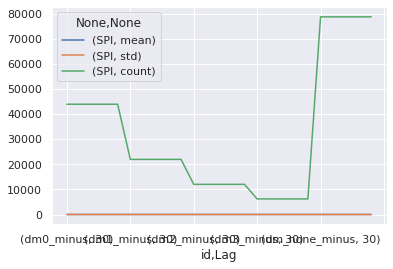

In [68]:
df_minus_new.groupby(['id', 'Lag']).agg({
    'SPI': ['mean', 'std', 'count']
}).plot()

In [74]:
df_minus.groupby(['id', 'Lag', 'Timeperiod']).std()

SPI
id            Lag Timeperiod          
dm0_minus     30  2010-2016   0.910401
                  2017-2021   1.184081
              60  2010-2016   0.913342
                  2017-2021   1.072028
              90  2010-2016   0.880917
                  2017-2021   1.175680
              180 2010-2016   0.800128
                  2017-2021   0.761419
              365 2010-2016   0.665636
                  2017-2021   0.947776
dm1_minus     30  2010-2016   1.070717
                  2017-2021   0.868435
              60  2010-2016   0.894659
                  2017-2021   1.075962
              90  2010-2016   0.852188
                  2017-2021   1.129891
              180 2010-2016   0.844196
                  2017-2021   0.828532
              365 2010-2016   0.719734
                  2017-2021   0.961328
dm2_minus     30  2010-2016   0.921033
                  2017-2021   0.668157
              60  2010-2016   0.762701
                  2017-2021   0.794174
              90  2010-2016   0.835593
                  2017-2021   0.690483
              180 2010-2016   0.880518
                  2017-2021   0.766490
              365 2010-2016   0.786205
                  2017-2021   0.884761
dm3_minus     30  2010-2016   0.660165
                  2017-2021   0.603303
              60  2010-2016   0.724029
                  2017-2021   0.526112
              90  2010-2016   0.767710
                  2017-2021   0.478594
              180 2010-2016   0.648413
                  2017-2021   0.468865
              365 2010-2016   0.678456
                  2017-2021   0.734492
dm_none_minus 30  2010-2016   0.902336
                  2017-2021   1.065169
              60  2010-2016   0.886413
                  2017-2021   1.012639
              90  2010-2016   0.852670
                  2017-2021   1.061466
              180 2010-2016   0.840840
                  2017-2021   0.983497
              365 2010-2016   0.850865
                  2017-2021   1.046965